In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from Figures.Boxplots import violin_plot_pandas

In [3]:
path = '/cellar/users/agross/TCGA_Code/Methlation/data/Validation/'

#### Read in annotations 

In [4]:
hiv_ann = pd.read_excel(path + 'Methylome human NEUvs WB.xlsx', 
                        sheetname='HIV', skiprows=2, index_col=0)
control_ann = pd.read_excel(path + 'Methylome human NEUvs WB.xlsx',
                            sheetname='Negative', skiprows=2, index_col=0)
ann = pd.concat([hiv_ann, control_ann], keys=['HIV+','HIV-'])
ann = ann.reset_index()
ann = ann.rename(columns={'Age (years)': 'age', 'level_0':'HIV'})
ann = ann.set_index('PATID')
#ann = ann.ix[betas.columns]

In [5]:
m2 = pd.read_excel('/cellar/users/agross/Downloads_Old/Methylome Study Demographic Data.xlsx',
              skiprows=5, index_col=0)
age2 = m2['Age (years)']
ann = ann.ix[ann.index.union(age2.index)]
ann['age'] = age2.combine_first(ann.age)
ann['HIV'] = ann.HIV.fillna('HIV+')

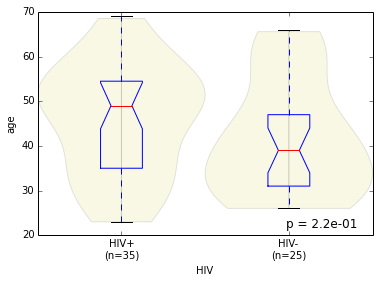

In [6]:
violin_plot_pandas(ann.HIV, ann.age)

In [7]:
age_n = pd.Series({'{}_Neu'.format(i[3:]): v for i,v in ann.age.iteritems()})
age_t = pd.Series({'{}_CD4'.format(i[3:]): v for i,v in ann.age.iteritems()})
age = pd.concat([age_n, age_t])

hiv_n = pd.Series({'{}_Neu'.format(i[3:]): v for i,v in ann.HIV.iteritems()})
hiv_t = pd.Series({'{}_CD4'.format(i[3:]): v for i,v in ann.HIV.iteritems()})
hiv = pd.concat([hiv_n, hiv_t])

In [8]:
cell_type = pd.Series(hiv.index, index=hiv.index)
cell_type = cell_type.map(lambda s: s.split('_')[1])

In [13]:
40.32 * 50

2016.0